<a href="https://colab.research.google.com/github/canerskrc/Veri_Bilimi_TechCareer_Pendik/blob/main/14_12_2024_DT_KodUygulama_Pendik.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Müşteri Kayıp Tahmini ( Decision Tree )

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
file_path = 'Bank_Customer.csv'
data = pd.read_csv(file_path)

In [3]:
# Özellik mühendisliği
#1- Balance/Estimated_salary =
#2- Tenure / Age =
#3- Creditscore/Age =

data['BalanceSalaryRatio'] = data['balance'] / data['estimated_salary']
data['TenureAgeRatio'] = data['tenure'] / data['age']
data['CreditScoreRatio'] = data['credit_score'] / data['age']

In [4]:
data.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,BalanceSalaryRatio,TenureAgeRatio,CreditScoreRatio
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [5]:
#X = data.drop(['gender','churn'], axis=1)

In [6]:
X = data[['credit_score','age','balance','products_number','active_member','BalanceSalaryRatio','TenureAgeRatio','CreditScoreRatio']]
y= data['churn']

In [7]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [8]:
clf = DecisionTreeClassifier(max_depth=3,random_state=42)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

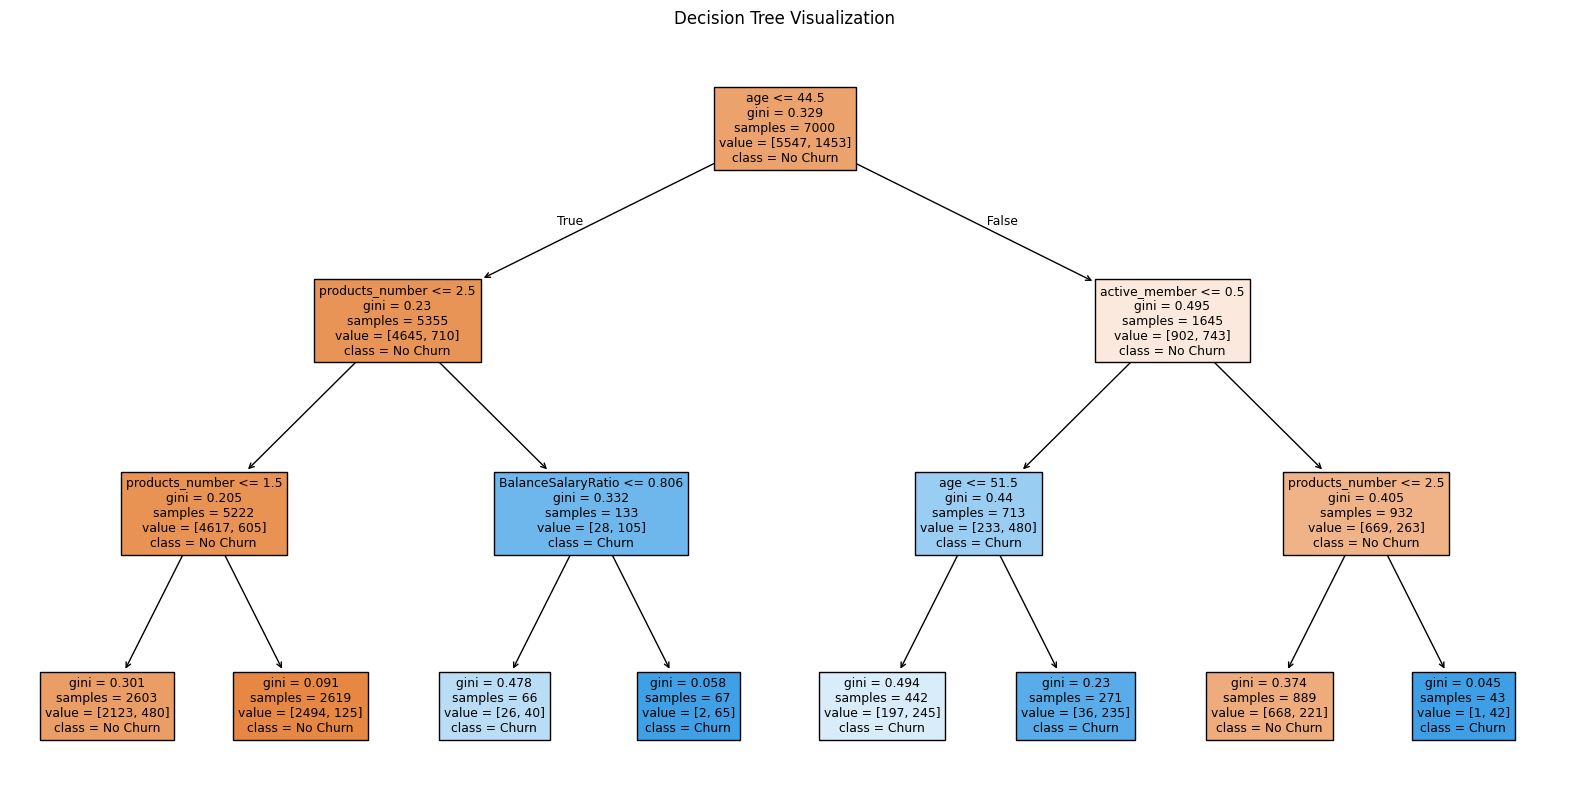

In [10]:
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=['No Churn','Churn'], filled=True)
plt.title('Decision Tree Visualization')
plt.show()